# Predicting Optic Nerve Damage Condition Based on Lipidomes


<img src="http://www.medifee.com/blog/wp-content/uploads/2015/03/glaucoma-low-tension.png" style="height:250px">

## Import the necessary libraries

In [197]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from sklearn.preprocessing import OneHotEncoder    
from sklearn.metrics import accuracy_score
from tensorflow.python.client import device_lib



## Import the data and transpose

Data were retrieved from [Metabolomics Workbench]("https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?Mode=Project&ProjectID=PR000859")

- The concentrations of the lipids for control and 14 days after sonication to damage the optic nerve. 
- N= 7/8 mice were used and matched to each condition


In [198]:

df = pd.read_csv("C:\\Users\coder\Documents\Mouse Gender\Mouse Lipid Gender for Training Combined Ion Modes 2 Conditions.csv")

## Transform the categorial variables into digits and seperate the target from data frame 

In [199]:
#Save the data frame and pop the target into a seperate array

df.dtypes 
df = df.fillna(0)
df['Condition'] = pd.Categorical(df['Condition'])
df['Condition'] = df.Condition.cat.codes
df['Sex'] = pd.Categorical(df['Sex'])
df['Sex'] = df.Sex.cat.codes
target = df.pop('Condition')





X = df.iloc[:,0:len(df.columns)].values


## Normalize the data 

In [200]:
#Normalizing the data

sc = StandardScaler()
X = sc.fit_transform(X)


## Use SVM-RFE to select the top k Features


In [201]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

svm = LinearSVC()


rfecv = RFECV(estimator=svm, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv = rfecv.fit(X, target)

X_select_features = rfecv.transform(X)





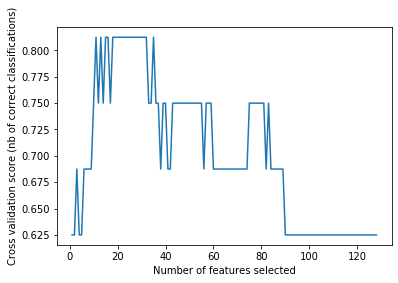

In [202]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [203]:
print("Number of features for optimal SVM classification: " +  str(rfecv.n_features_))
print("Accuracy of classification for " + str(rfecv.n_features_) + " features: " + str(rfecv.grid_scores_[rfecv.n_features_ - 1]))

Number of features for optimal SVM classification: 11
Accuracy of classification for 11 features: 0.8125
